<a href="https://colab.research.google.com/github/Linakatabicity/DLModule/blob/main/DeepLearningBreakoutwithoutOutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym[atari]
!apt-get install -y xvfb x11-utils
!pip install pyvirtualdisplay==0.2.*
!pip install autorom[accept-rom-license]
!pip install --upgrade gym==0.19.0
!pip install -U "ray[rllib]"==1.6
!pip install tensorboardX
!pip install --upgrade grpcio 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#to clear tensor board log files
!rm -rf  /root/ray_results

In [ ]:
from ray.rllib.agents.ppo import PPOTrainer
import ray.rllib.agents.dqn as dqn
import gym
import matplotlib.pyplot as plt
from IPython import display
from ray import tune
import datetime
%load_ext tensorboard
import tensorflow as tf
import tensorboardX


## Render the environment for visual

Reward 0.0


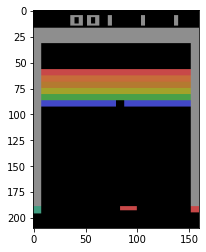

In [ ]:

env = gym.make('Breakout-v0')
env.reset()
for _ in range(100):
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    observation, reward, done, info = env.step(env.action_space.sample())

    print("Reward", reward)
    env.step(action)

## Code Helper 

In [ ]:
# Import the RL algorithm (Trainer) we would like to use.


def evaluation_fn(result):
    return result['episode_reward_mean']


def objective_fn(config):   
    trainer = dqn.DQNTrainer(config=config)
    for i in range(100):
      # Perform one iteration of training the policy with DQN
      result = trainer.train()
      intermediate_score = evaluation_fn(result)
      
      # Feed the score back back to Tune.
      tune.report(iterations=i, mean_reward=intermediate_score)


## Configure Set up

In [ ]:

config = dqn.DEFAULT_CONFIG.copy()
config["env"] = 'Breakout-v0'
config["dueling"] = True
config["double_q"] = True
config["gamma"] = tune.uniform(0, 1)
config["train_batch_size"] = tune.grid_search([25,32,62])
config['num_gpus'] =  1
config['lr'] = 0.001







## Run Analysis

In [ ]:

analysis = tune.run(
        objective_fn,
        metric="mean_reward",
        mode="max",
        #stop = {'episode_reward_mean': 20},
        num_samples=3,
        resources_per_trial={'gpu': 1},
        config=config
        )

%reload_ext tensorboard
%tensorboard --logdir  /root/ray_results
#print("Best hyperparameters found were: ", analysis.best_config)


In [ ]:
print("Best hyperparameters found were: ", analysis.best_config)

Best hyperparameters found were:  {'num_workers': 0, 'num_envs_per_worker': 1, 'create_env_on_driver': False, 'rollout_fragment_length': 4, 'batch_mode': 'truncate_episodes', 'gamma': 0.9636508942389949, 'lr': 0.001, 'train_batch_size': 25, 'model': {'_use_default_native_models': False, 'fcnet_hiddens': [256, 256], 'fcnet_activation': 'tanh', 'conv_filters': None, 'conv_activation': 'relu', 'post_fcnet_hiddens': [], 'post_fcnet_activation': 'relu', 'free_log_std': False, 'no_final_linear': False, 'vf_share_layers': True, 'use_lstm': False, 'max_seq_len': 20, 'lstm_cell_size': 256, 'lstm_use_prev_action': False, 'lstm_use_prev_reward': False, '_time_major': False, 'use_attention': False, 'attention_num_transformer_units': 1, 'attention_dim': 64, 'attention_num_heads': 1, 'attention_head_dim': 32, 'attention_memory_inference': 50, 'attention_memory_training': 50, 'attention_position_wise_mlp_dim': 32, 'attention_init_gru_gate_bias': 2.0, 'attention_use_n_prev_actions': 0, 'attention_use_

In [ ]:
config = dqn.DEFAULT_CONFIG.copy()
config["env"] = 'Breakout-v0'
config["dueling"] = True
config["double_q"] = True
config["gamma"] = 0.963651
config["train_batch_size"] = 25
config['num_gpus'] =  1
config['lr'] = 0.001
config['timesteps_per_iteration']= 2500

config2 = dqn.DEFAULT_CONFIG.copy()
config2["env"] = 'Breakout-v0'
config2["dueling"] = False
config2["double_q"] = True
config2["gamma"] = 0.963651
config2["train_batch_size"] = 25
config2['num_gpus'] =  1
config2['lr'] = 0.001
config2['timesteps_per_iteration']= 2500

config3 = dqn.DEFAULT_CONFIG.copy()
config3["env"] = 'Breakout-v0'
config3["dueling"] = False
config3["double_q"] = True
config3["gamma"] = 0.963651
config3["train_batch_size"] = 25
config3['num_gpus'] =  1
config3['lr'] = 0.001
config3['timesteps_per_iteration']= 2500


config4 = dqn.DEFAULT_CONFIG.copy()
config4["env"] = 'Breakout-v0'
config4["dueling"] = True
config4["double_q"] = True
config4['prioritized_replay'] = False
config4["gamma"] = 0.963651
config4["train_batch_size"] = 25
config4['num_gpus'] =  1
config4['lr'] = 0.001
config4['timesteps_per_iteration']= 2500




In [ ]:

!rm -rf  /root/ray_results
%reload_ext tensorboard
%tensorboard --logdir  /root/ray_results

analysis = tune.run(
        objective_fn,
        metric="mean_reward",
        mode="max",
        #stop = {'episode_reward_mean': 20},
        num_samples=1,
        resources_per_trial={'gpu': 1},
        config=config

        )

analysis2 = tune.run(
        objective_fn,
        metric="mean_reward",
        mode="max",
        #stop = {'episode_reward_mean': 20},
        num_samples=1,
        resources_per_trial={'gpu': 1},
        config=config2

        )
analysis3 = tune.run(
        objective_fn,
        metric="mean_reward",
        mode="max",
        #stop = {'episode_reward_mean': 20},
        num_samples=1,
        resources_per_trial={'gpu': 1},
        config=config3

        )
analysis4 = tune.run(
        objective_fn,
        metric="mean_reward",
        mode="max",
        #stop = {'episode_reward_mean': 20},
        num_samples=1,
        resources_per_trial={'gpu': 1},
        config=config4

        )
